In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
tt = pd.read_csv("titanic.csv")
tt.head(4)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S

In [4]:
tt.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
tt.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
tt.drop("Cabin", axis=1, inplace=True)

In [7]:
tt['Age'].fillna(29.69, inplace=True)

In [8]:
tt['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
tt['Embarked'].fillna("S", inplace=True)

In [10]:
tt.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
gender_count = tt['Sex'].value_counts()
gender_count

male      577
female    314
Name: Sex, dtype: int64

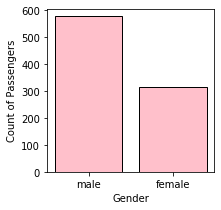

In [12]:
fig = plt.figure(figsize=(3,3))
plt.bar(gender_count.index, gender_count.values, color='Pink', edgecolor='Black')
plt.xlabel('Gender')
plt.ylabel("Count of Passengers")
plt.show()

In [13]:
sur_count = tt.Survived.value_counts()
sur_count

0    549
1    342
Name: Survived, dtype: int64

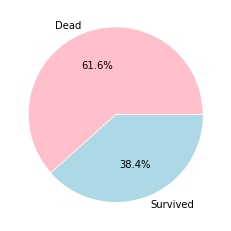

In [14]:
plt.pie(sur_count.values, labels=['Dead','Survived'], autopct="%1.1f%%", colors=['Pink','Lightblue'],
       explode=[0.01,0])
plt.show()

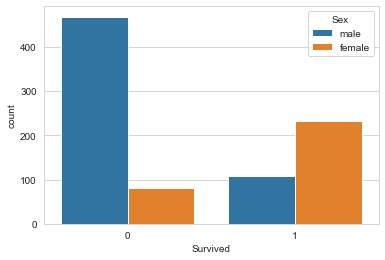

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data= tt)
plt.show()

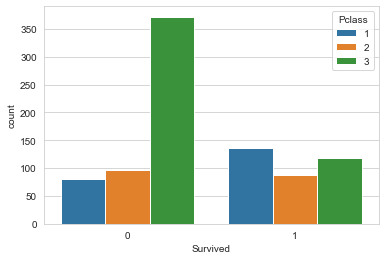

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data= tt)
plt.show()

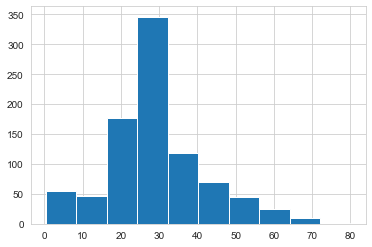

In [17]:
plt.hist(tt['Age'])
plt.show()

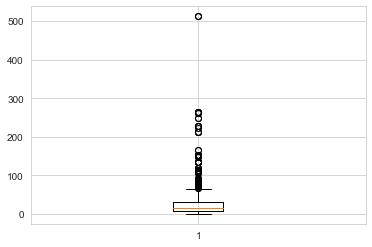

In [18]:
plt.boxplot(tt['Fare'])
plt.show()

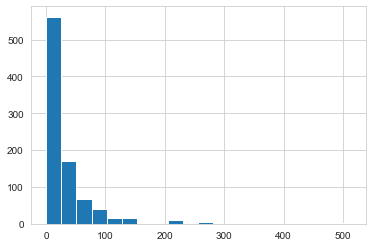

In [19]:
plt.hist(tt.Fare, bins=20)
plt.show()

In [20]:
print("The average ticket fare is:", np.mean(tt.Fare))

The average ticket fare is: 32.2042079685746


In [21]:
print("The average ticket fare of first class:", np.mean(tt[tt['Pclass']==1]['Fare']))

The average ticket fare of first class: 84.15468749999992


In [22]:
print("The average ticket fare of second class:", np.mean(tt[tt['Pclass']==2]['Fare']))

The average ticket fare of second class: 20.66218315217391


In [23]:
print("The average ticket fare of third class:", np.mean(tt[tt['Pclass']==3]['Fare']))

The average ticket fare of third class: 13.675550101832997


In [24]:
#Using group by
avg_fares = tt.groupby('Pclass')['Fare'].mean()
avg_fares

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

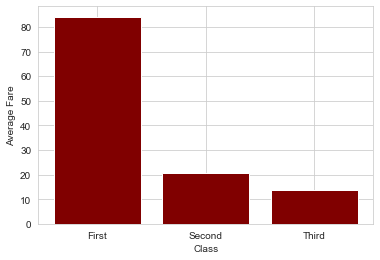

In [25]:
plt.bar(['First','Second','Third'],avg_fares.values, color = 'Maroon')
plt.xlabel("Class")
plt.ylabel("Average Fare")
plt.show()

In [26]:
#Ecoding Sex column
from sklearn.preprocessing import LabelEncoder

In [27]:
encode = LabelEncoder()
tt['Sex'] = encode.fit_transform(tt['Sex'])

In [28]:
tt.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   

             Ticket     Fare Embarked  
0         A/5 21171   7.2500        S  
1          PC 17599  71.2833        C  
2  STON/O2. 3101282   7.9250        S

In [29]:
X = tt[['Pclass','Sex','Age','Fare']]
y = tt['Survived']

In [30]:
x_tr,x_te,y_tr,y_te = train_test_split(X,y,test_size=0.2)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()
model.fit(x_tr, y_tr)

LogisticRegression()

In [33]:
y_pred = model.predict(x_te)

In [34]:
y_pred[0:10]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score
print("The percentage accuracy of the model is:", accuracy_score(y_te, y_pred)*100)

The percentage accuracy of the model is: 81.00558659217877


In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_te, y_pred)

array([[107,  21],
       [ 13,  38]], dtype=int64)

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
depth = [1,2,3,4,5,6,7,8,9,10,11,12]
accuracies = []
for i in depth:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(x_tr, y_tr)
    y_pred = model.predict(x_te)
    accuracies.append(accuracy_score(y_te, y_pred)*100)

In [39]:
for i in range(len(depth)):
    print(f"Accuracy of decision tree with depth {depth[i]} is {accuracies[i]}")

Accuracy of decision tree with depth 1 is 81.56424581005587
Accuracy of decision tree with depth 2 is 81.56424581005587
Accuracy of decision tree with depth 3 is 84.35754189944134
Accuracy of decision tree with depth 4 is 82.68156424581005
Accuracy of decision tree with depth 5 is 82.68156424581005
Accuracy of decision tree with depth 6 is 84.91620111731844
Accuracy of decision tree with depth 7 is 84.35754189944134
Accuracy of decision tree with depth 8 is 82.68156424581005
Accuracy of decision tree with depth 9 is 82.12290502793296
Accuracy of decision tree with depth 10 is 82.68156424581005
Accuracy of decision tree with depth 11 is 82.68156424581005
Accuracy of decision tree with depth 12 is 81.56424581005587


In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(x_tr, y_tr)
y_pred = model.predict(x_te)
accuracy_score(y_te, y_pred)*100

77.09497206703911

In [49]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_tr, y_tr)
y_pred = model.predict(x_te)
accuracy_score(y_te, y_pred)*100

73.18435754189943

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
model = GaussianNB()
model.fit(x_tr, y_tr)
y_pred = model.predict(x_te)
accuracy_score(y_te, y_pred)*100

79.3296089385475